# Проект по SQL. Анализ базы данных для сервиса книг.

## Описание проекта
Ваша компания решила быть на волне и купила крупный сервис для чтения книг по подписке. Ваша первая задача как аналитика — проанализировать базу данных.
В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.


## Цель
- Проанализировать базу данных, а именно:
    - Посчитать, сколько книг вышло после 1 января 2000 года;
    - Для каждой книги посчитать количество обзоров и среднюю оценку;
    - Определить издательство, которое выпустило наибольшее число книг толще 50 страниц — исключить из анализа брошюры;
    - Определить автора с самой высокой средней оценкой книг — учитывая только книги с 50 и более оценками;
    - Посчитать среднее количество обзоров от пользователей, которые поставили больше 50 оценок.


## Описание данных
<b>Структура `books`</b>
- `'book_id'` — идентификатор книги;
- `'author_id'` — идентификатор автора;
- `'title'` — название книги;
- `'num_pages'` — количество страниц;
- `'publication_date'` — дата публикации книги;
- `'publisher_id'` — идентификатор издателя.

<b>Структура `authors`</b>
- `'author_id'` — идентификатор автора;
- `'author'` — имя автора.

<b>Структура `publishers`</b>
- `'publisher_id'` — идентификатор издательства;
- `'publisher'` — название издательства;

<b>Структура `ratings`</b>
- `'rating_id'` — идентификатор оценки;
- `'book_id'` — идентификатор книги;
- `'username'` — имя пользователя, оставившего оценку;
- `'rating'` — оценка книги.

<b>Структура `reviews`</b>
- `'review_id'` — идентификатор обзора;
- `'book_id'` — идентификатор книги;
- `'username'` — имя автора обзора;
- `'text'` — текст обзора.

## Схема данных
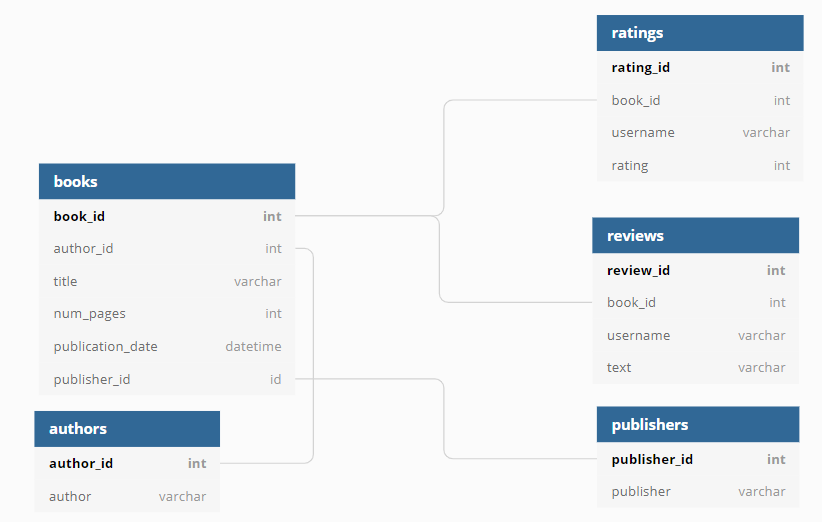



## План работы
* Исследуем таблицы, выведем 5 строк.
* Проанализировать базу данных.
    * Посчитаем, сколько книг вышло после 1 января 2000 года;
    * Для каждой книги посчитаем количество обзоров и среднюю оценку;
    * Определим издательство, которое выпустило наибольшее число книг толще 50 страниц, исключим из анализа брошюры;
    * Определим автора с самой высокой средней оценкой книг, учтём только книги с 50 и более оценками;
    * Посчитаем среднее количество обзоров от пользователей, которые поставили больше 50 оценок.

<b> Служебный блок.

In [1]:
#Импортируем библиотеки
import pandas as pd 
from sqlalchemy import create_engine 

In [2]:
# устанавливаем параметры 
db_config = {'user': 'praktikum_student', # имя пользователя  
             'pwd': 'Sdf4$2;d-d30pp', # пароль  
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',  
             'port': 6432, # порт подключения  
             'db': 'data-analyst-final-project-db'} # название базы данных 
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],  
                                                         db_config['pwd'],  
                                                         db_config['host'],  
                                                         db_config['port'],  
                                                         db_config['db']) # сохраняем коннектор 
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

# pd.set_option('display.max_rows', None)

## Исследуем таблицы, выведем 5 строк.

<b>`books`

In [3]:
query = ''' SELECT *
            FROM books
        '''
books = pd.io.sql.read_sql(query, con=engine, index_col='book_id')
books.head()

,author_id,title,num_pages,publication_date,publisher_id
book_id,,,,,
1,546,'Salem's Lot,594,2005-11-01,93
2,465,1 000 Places to See Before You Die,992,2003-05-22,336
3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
5,125,1776,386,2006-07-04,268


<b>`authors`

In [4]:
query = ''' SELECT *
            FROM authors
        '''
authors = pd.io.sql.read_sql(query, con=engine, index_col='author_id')
authors.head()

,author
author_id,
1,A.S. Byatt
2,Aesop/Laura Harris/Laura Gibbs
3,Agatha Christie
4,Alan Brennert
5,Alan Moore/David Lloyd


<b>`publishers`

In [5]:
query = ''' SELECT *
            FROM publishers
        '''
publishers = pd.io.sql.read_sql(query, con=engine, index_col='publisher_id')
publishers.head()

,publisher
publisher_id,
1,Ace
2,Ace Book
3,Ace Books
4,Ace Hardcover
5,Addison Wesley Publishing Company


<b>`ratings`

In [6]:
query = ''' SELECT *
            FROM ratings
        '''
ratings = pd.io.sql.read_sql(query, con=engine, index_col='rating_id')
ratings.head()

,book_id,username,rating
rating_id,,,
1,1,ryanfranco,4
2,1,grantpatricia,2
3,1,brandtandrea,5
4,2,lorichen,3
5,2,mariokeller,2


<b>`reviews`

In [7]:
query = ''' SELECT *
            FROM reviews
        '''
reviews = pd.io.sql.read_sql(query, con=engine, index_col='review_id')
reviews.head()

,book_id,username,text
review_id,,,
1,1,brandtandrea,Mention society tell send professor analysis. ...
2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
4,3,johnsonamanda,Finally month interesting blue could nature cu...
5,3,scotttamara,Nation purpose heavy give wait song will. List...


## Проанализировать базу данных

### Посчитаем, сколько книг вышло после 1 января 2000 года

In [8]:
query = ''' SELECT COUNT(book_id)
            FROM books
            WHERE publication_date::date > '2000-01-01'
        '''
output = pd.io.sql.read_sql(query, con=engine)
print('После 1 января 2000 года вышло: {} книг.'.format(output['count'][0]))

После 1 января 2000 года вышло: 819 книг.


<b> Первая печатная книга (Библия) не имеет года выхода, но считается, что она была напечатана в 1454/1455 годах, не позднее 1456 года. Книжная орнаментика выполнена вручную по образцу оформления рукописных кодексов.<br>
    С тех пор было выпущено более 130 млн. книг, количество выпускаемых книг ежегодно растет, поэтому 819 книг — это очень мало, вероятно, в базу попадают только популярные в широких массах книги, по определенным жанрам.

### Для каждой книги посчитаем количество обзоров и среднюю оценку

In [9]:
query = ''' SELECT b.title,
                   COUNT(rv.review_id) AS reviwes,
                   AVG(rt.rating) AS avg_rating
            FROM 
            (SELECT book_id,
                    title
            FROM books) AS b
            LEFT OUTER JOIN
            (SELECT book_id,
                    rating
            FROM ratings) AS rt ON rt.book_id = b.book_id
            LEFT OUTER JOIN
            (SELECT book_id,
                    review_id
            FROM reviews) AS rv ON rv.book_id = b.book_id
            GROUP BY title
            ORDER BY 3 DESC
        '''
output = pd.io.sql.read_sql(query, con=engine)
output.head(15)

,title,reviwes,avg_rating
0,Captivating: Unveiling the Mystery of a Woman'...,4,5.0
1,Evening Class,4,5.0
2,In the Hand of the Goddess (Song of the Liones...,6,5.0
3,The Big Bad Wolf (Alex Cross #9),4,5.0
4,A Dirty Job (Grim Reaper #1),16,5.0
5,Piercing the Darkness (Darkness #2),4,5.0
6,Alas Babylon,4,5.0
7,The Woman in Black,4,5.0
8,Triptych (Will Trent #1),4,5.0
9,How to Be a Domestic Goddess: Baking and the A...,2,5.0


<b> Большое количество обзоров у книг 'на слуху', распиаренных, но тем не менее рейтинги у них не самые высокие, так как, их читает больше людей и мнения/опыт у всех разный, самые высокие оценки у книг с малым количеством обзоров. Для бизнеса важнее первая категория - книги с большим кол-вом обзоров, с рейтингом выше среднего. Судя по названиям, сервис ориентирован на англоязычных пользователей.

###  Определим издательство, которое выпустило наибольшее число книг толще 50 страниц, исключим из анализа брошюры

In [10]:
query = ''' SELECT p.publisher,
                   COUNT(p.publisher_id)
            FROM
            (SELECT publisher_id
            FROM books
            WHERE num_pages > 50) AS b
            LEFT OUTER JOIN
            (SELECT *
            FROM publishers) AS p ON p.publisher_id = b.publisher_id
            GROUP BY 1
            ORDER BY 2 DESC
            LIMIT 1
        '''
output = pd.io.sql.read_sql(query, con=engine)
output

,publisher,count
0,Penguin Books,42


Вывод без счетчика

In [11]:
query = ''' SELECT p.publisher         
            FROM
            (SELECT publisher_id
            FROM books
            WHERE num_pages > 50) AS b
            LEFT OUTER JOIN
            (SELECT *
            FROM publishers) AS p ON p.publisher_id = b.publisher_id
            GROUP BY 1
            ORDER BY COUNT(p.publisher_id) DESC
            LIMIT 1
        '''
output = pd.io.sql.read_sql(query, con=engine)
print('Издательство выпустившее наибольшее число книг: {}'.format(output['publisher'][0]))

Издательство выпустившее наибольшее число книг: Penguin Books


<b> Популярное британское издательство, главной заслугой издательства считают демократизацию книжного рынка, превратившую книгу из предмета роскоши в удовольствие, доступное массам, есстественно книги они в основном издают на английском языке.

### Определим автора с самой высокой средней оценкой книг, учитем только книги с 50 и более оценками

In [12]:
query = ''' WITH 
            b_f AS
            (
            SELECT  b.book_id,
                    b.author_id,
                    COUNT(rt.rating_id)
            FROM 
            (SELECT book_id,
                    author_id
            FROM books) AS b
            LEFT OUTER JOIN
            (SELECT book_id,
                    rating_id
            FROM ratings) AS rt ON rt.book_id = b.book_id
            GROUP BY 1,2
            HAVING COUNT(rt.rating_id) > 50
            ORDER BY 3 DESC
            )
            
            SELECT a.author,
                   AVG(rt.rating)   
            FROM b_f
            LEFT OUTER JOIN
            (SELECT *
            FROM authors) AS a ON a.author_id = b_f.author_id
            LEFT OUTER JOIN
            (SELECT book_id,
                    rating
            FROM ratings) AS rt ON rt.book_id = b_f.book_id
            GROUP BY 1
            ORDER BY 2 DESC
            LIMIT 1
                       
        '''
output = pd.io.sql.read_sql(query, con=engine)
output

,author,avg
0,J.K. Rowling/Mary GrandPré,4.287097


<b> Автор и иллюстратор книг о Гарри Поттере, что не удивительно, очень популярные и раскрученные книги, по которым до сих пор снимаются фильмы.

### Посчитаем среднее количество обзоров от пользователей, которые поставили больше 50 оценок

In [13]:
query = ''' WITH 
            u_f AS
            (
            SELECT username,
                   COUNT(rating_id)
            FROM ratings
            GROUP BY 1
            HAVING COUNT(rating_id) > 50
            ORDER BY 2 DESC
            ),
            rv_c AS
            (
            SELECT rv.username,
                   COUNT(rv.review_id)
            FROM u_f
            LEFT OUTER JOIN
            (SELECT username,
                    review_id
            FROM reviews) AS rv ON rv.username = u_f.username 
            GROUP BY 1
            )
            
            SELECT AVG(count)
            FROM rv_c
        '''
output = pd.io.sql.read_sql(query, con=engine)
print('Cреднее количество обзоров от пользователей, которые поставили больше 50 оценок: {:.2f}'.format(output['avg'][0]))

Cреднее количество обзоров от пользователей, которые поставили больше 50 оценок: 24.33


<b> Вероятно есть корреляция между кол-ом оценок и количеством обзоров, пользователи, которые ставят много оценок, это наиболее активные пользователи, максимальное удержание, им нравится приложение и они чаще пишут обзоры, если бы им не нравилось приложение и сервисы, они бы не стали тратить время.

Альтернативное решение с оконными функциями.

In [14]:
query = ''' WITH
            rt AS
            (
            SELECT username,
                   COUNT(rating_id) OVER (PARTITION BY username) AS count_rt
            FROM ratings
            ),
            rv AS
            (
            SELECT username,
                   COUNT(review_id) OVER (PARTITION BY username) AS count_rv
            FROM reviews
            )
            
            SELECT AVG(count_rv)
            FROM
            (SELECT DISTINCT rt.username,
                    rv.count_rv
            FROM rt
            LEFT OUTER JOIN rv ON rv.username = rt.username
            WHERE count_rt > 50) AS rtv
        '''
output = pd.io.sql.read_sql(query, con=engine)
print('Cреднее количество обзоров от пользователей, которые поставили больше 50 оценок: {:.2f}'.format(output['avg'][0]))

Cреднее количество обзоров от пользователей, которые поставили больше 50 оценок: 24.33
